In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline


# For ordinal encoding categorical variables, splitting data
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OrdinalEncoder, FunctionTransformer, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#To Pipeline the process 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# For training random forest model
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.model_selection import cross_val_score, KFold

#Grid Search
from sklearn.model_selection import GridSearchCV

from xgboost import XGBRegressor
from xgboost import cv
from xgboost import plot_importance
from sklearn.decomposition import PCA

#from yellowbrick.target import FeatureCorrelation

import tensorflow as tf
import matplotlib as mpl
import xgboost as XGB

Data Fetch

In [34]:
raw_test_data = pd.read_csv('test.csv')
raw_train_data = pd.read_csv('train.csv',index_col=0)

Getting familiar with Data

In [35]:
raw_test_data.shape,raw_train_data.shape

((200000, 25), (300000, 25))

In [36]:
raw_train_data.head(10)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
2,B,B,A,A,B,D,A,F,A,O,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
3,A,A,A,C,B,D,A,D,A,F,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
4,B,B,A,C,B,D,A,E,C,K,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
6,A,A,A,C,B,D,A,E,A,N,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260
7,A,B,A,C,B,D,A,E,G,F,...,0.392432,0.658169,0.997473,0.569874,0.960864,0.238050,0.316065,0.731729,0.694719,8.028558
8,B,A,A,A,B,D,A,E,C,F,...,0.396705,0.273454,0.824573,0.656325,0.677114,0.808445,0.615973,0.631677,0.283561,7.811465
9,A,A,A,C,B,B,A,E,A,M,...,0.633353,0.339760,0.802006,1.010997,0.391221,0.057297,0.591120,0.074629,0.775869,7.674188
10,A,B,A,C,B,D,A,E,G,I,...,0.472564,0.414036,0.809142,1.013301,0.761183,1.041711,0.393960,0.782381,0.865610,8.090095


In [37]:
raw_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 1 to 499999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cont0   300000 non-null  float64
 11  cont1   300000 non-null  float64
 12  cont2   300000 non-null  float64
 13  cont3   300000 non-null  float64
 14  cont4   300000 non-null  float64
 15  cont5   300000 non-null  float64
 16  cont6   300000 non-null  float64
 17  cont7   300000 non-null  float64
 18  cont8   300000 non-null  float64
 19  cont9   300000 non-null  float64
 20  cont10  300000 non-null  float64
 21  cont11  30

In [38]:
raw_train_data.describe(include='all')

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000,...,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
unique,2,2,2,4,4,4,8,8,7,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,A,A,A,C,B,B,A,E,C,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,193130,154824,253886,263356,294737,149340,290511,276040,111103,71249,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273,8.241979
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950,0.746555
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050,0.140329
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669,7.742071
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400,8.191373
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447,8.728634


In [39]:
raw_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      200000 non-null  int64  
 1   cat0    200000 non-null  object 
 2   cat1    200000 non-null  object 
 3   cat2    200000 non-null  object 
 4   cat3    200000 non-null  object 
 5   cat4    200000 non-null  object 
 6   cat5    200000 non-null  object 
 7   cat6    200000 non-null  object 
 8   cat7    200000 non-null  object 
 9   cat8    200000 non-null  object 
 10  cat9    200000 non-null  object 
 11  cont0   200000 non-null  float64
 12  cont1   200000 non-null  float64
 13  cont2   200000 non-null  float64
 14  cont3   200000 non-null  float64
 15  cont4   200000 non-null  float64
 16  cont5   200000 non-null  float64
 17  cont6   200000 non-null  float64
 18  cont7   200000 non-null  float64
 19  cont8   200000 non-null  float64
 20  cont9   200000 non-null  float64
 21  cont10  20

Preparing Data for Traing and Testing

In [40]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_features  = [cname for cname in raw_train_data.columns if
                    raw_train_data[cname].nunique() <= 15 and 
                    raw_train_data[cname].dtype == "object"]

# Select numerical columns
numeric_features  = [cname for cname in raw_train_data.columns if 
                raw_train_data[cname].dtype in ['int64', 'float64']]

In [41]:
#train_cat = raw_train_data.select_dtypes(object)
#test_cat = raw_test_data.select_dtypes(object)

In [42]:
features = categorical_features + numeric_features

In [43]:
#remove target column from Numeric features
numeric_features.remove('target')

Correlation between all features

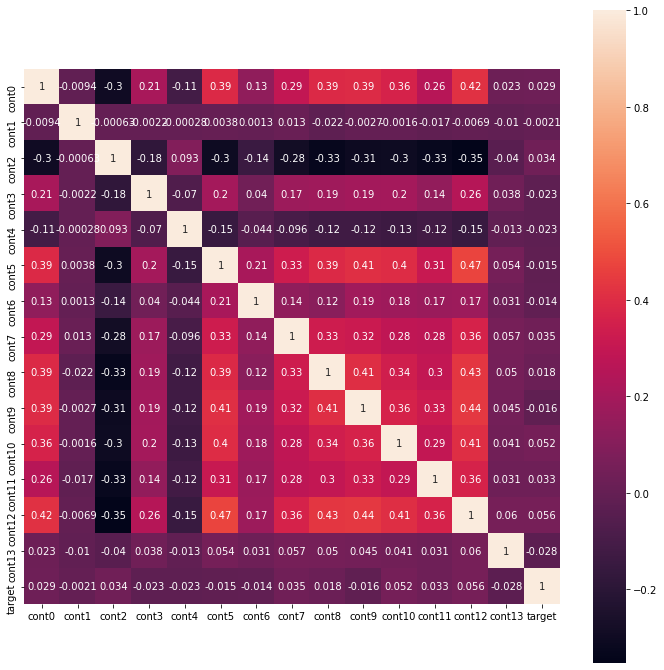

In [44]:
correlations = raw_train_data[features].corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(correlations, square=True, cbar=True, annot=True, vmax=1);

array([[<AxesSubplot:title={'center':'cont0'}>,
        <AxesSubplot:title={'center':'cont1'}>,
        <AxesSubplot:title={'center':'cont2'}>,
        <AxesSubplot:title={'center':'cont3'}>],
       [<AxesSubplot:title={'center':'cont4'}>,
        <AxesSubplot:title={'center':'cont5'}>,
        <AxesSubplot:title={'center':'cont6'}>,
        <AxesSubplot:title={'center':'cont7'}>],
       [<AxesSubplot:title={'center':'cont8'}>,
        <AxesSubplot:title={'center':'cont9'}>,
        <AxesSubplot:title={'center':'cont10'}>,
        <AxesSubplot:title={'center':'cont11'}>],
       [<AxesSubplot:title={'center':'cont12'}>,
        <AxesSubplot:title={'center':'cont13'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

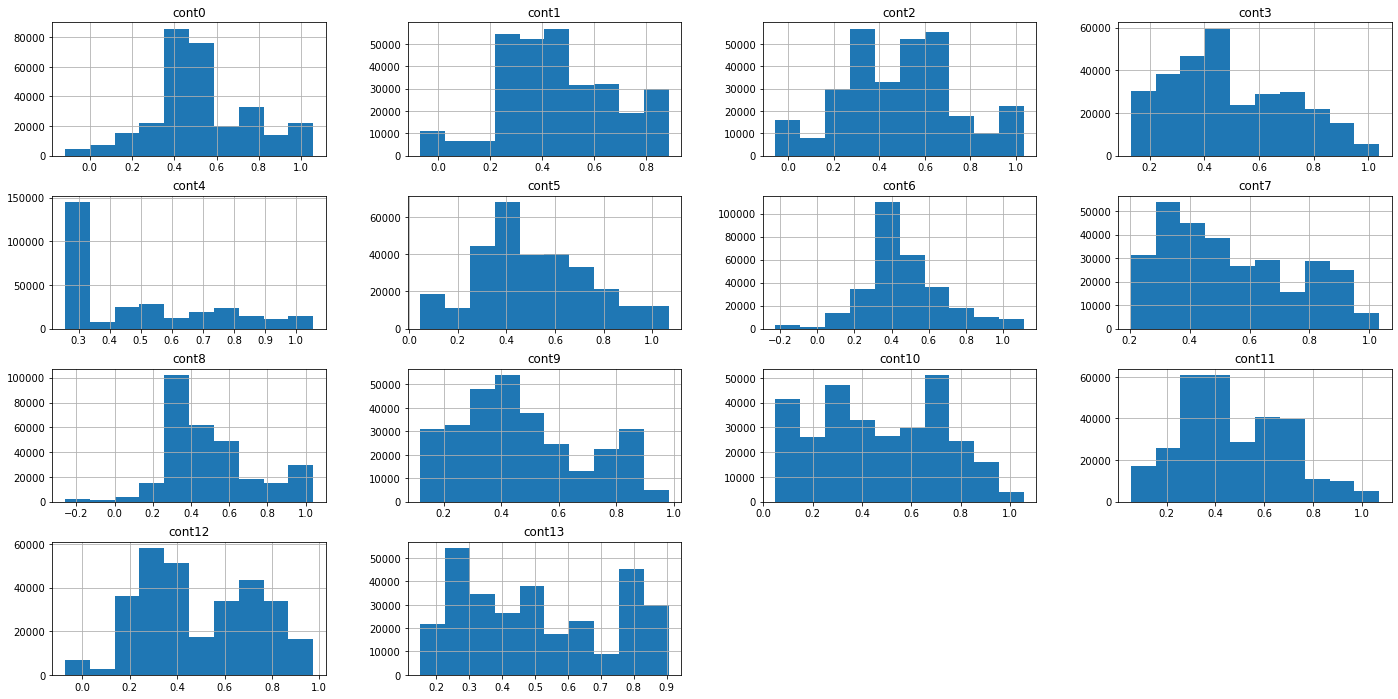

In [45]:
## Data Distribution of numeric features 
raw_train_data[numeric_features].hist(figsize=(24,12))

In [46]:
for col in numeric_features:
    print("Skewness of ",col, ": %f" % raw_train_data[col].skew())

Skewness of  cont0 : 0.236360
Skewness of  cont1 : 0.032677
Skewness of  cont2 : 0.082866
Skewness of  cont3 : 0.402795
Skewness of  cont4 : 0.776598
Skewness of  cont5 : 0.275822
Skewness of  cont6 : 0.507824
Skewness of  cont7 : 0.428809
Skewness of  cont8 : 0.540071
Skewness of  cont9 : 0.388129
Skewness of  cont10 : 0.056184
Skewness of  cont11 : 0.318717
Skewness of  cont12 : 0.101119
Skewness of  cont13 : 0.243352


To remove data skewness we use log transform

array([[<AxesSubplot:title={'center':'cont0'}>,
        <AxesSubplot:title={'center':'cont1'}>,
        <AxesSubplot:title={'center':'cont2'}>,
        <AxesSubplot:title={'center':'cont3'}>],
       [<AxesSubplot:title={'center':'cont4'}>,
        <AxesSubplot:title={'center':'cont5'}>,
        <AxesSubplot:title={'center':'cont6'}>,
        <AxesSubplot:title={'center':'cont7'}>],
       [<AxesSubplot:title={'center':'cont8'}>,
        <AxesSubplot:title={'center':'cont9'}>,
        <AxesSubplot:title={'center':'cont10'}>,
        <AxesSubplot:title={'center':'cont11'}>],
       [<AxesSubplot:title={'center':'cont12'}>,
        <AxesSubplot:title={'center':'cont13'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

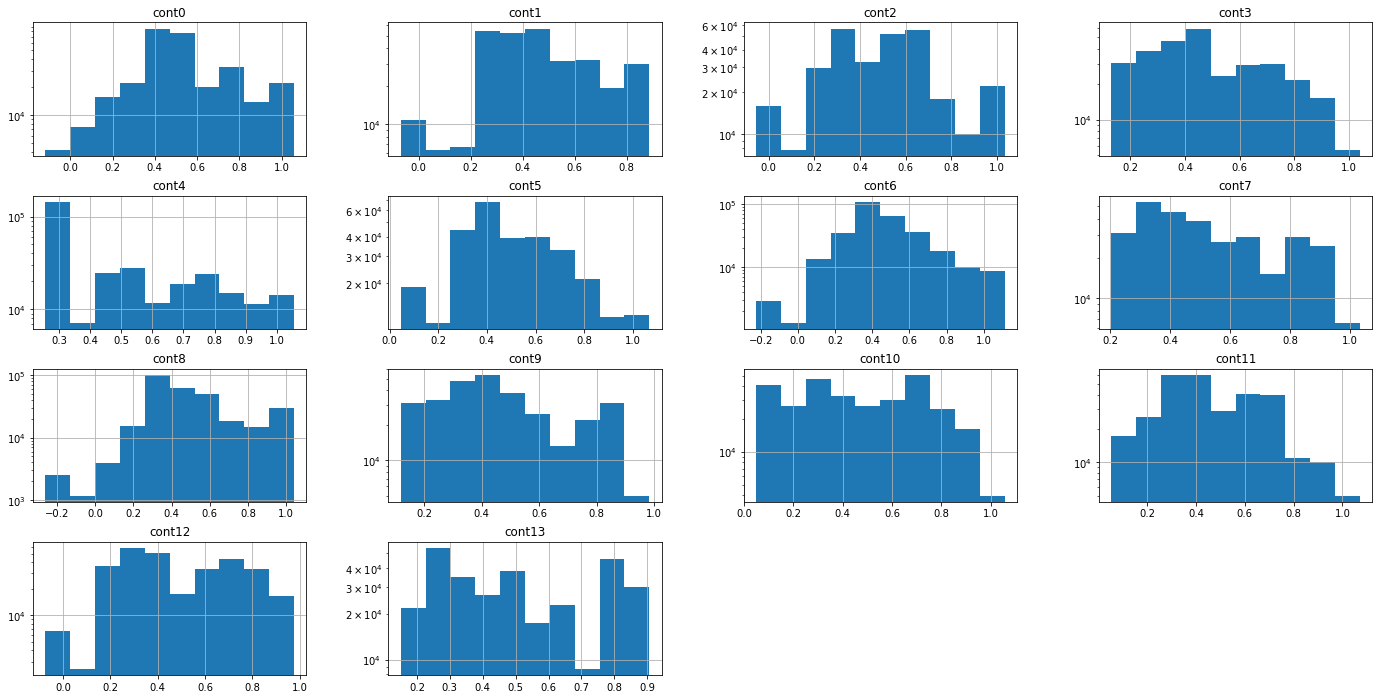

In [47]:
raw_train_data[numeric_features].hist(figsize=(24,12), log = True)

Removing Outliers to the Data

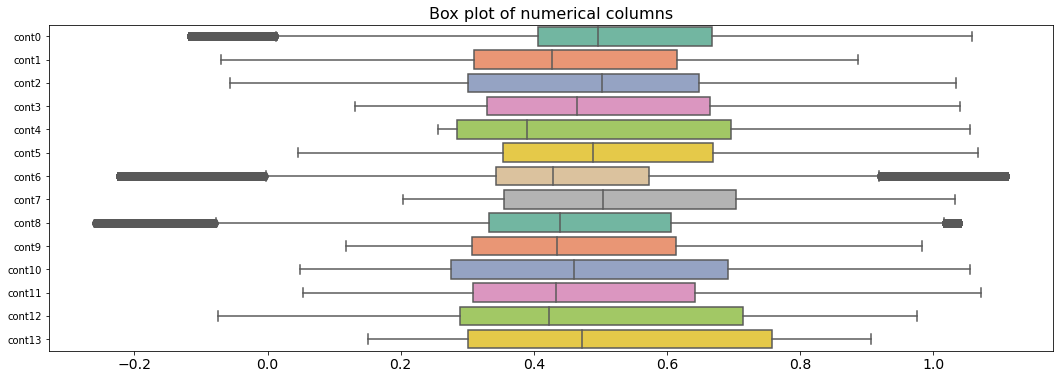

In [48]:
# Box Plot for Outliers
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=raw_train_data[numeric_features], orient="h", palette="Set2");
plt.xticks(fontsize= 14)
plt.title('Box plot of numerical columns', fontsize=16);

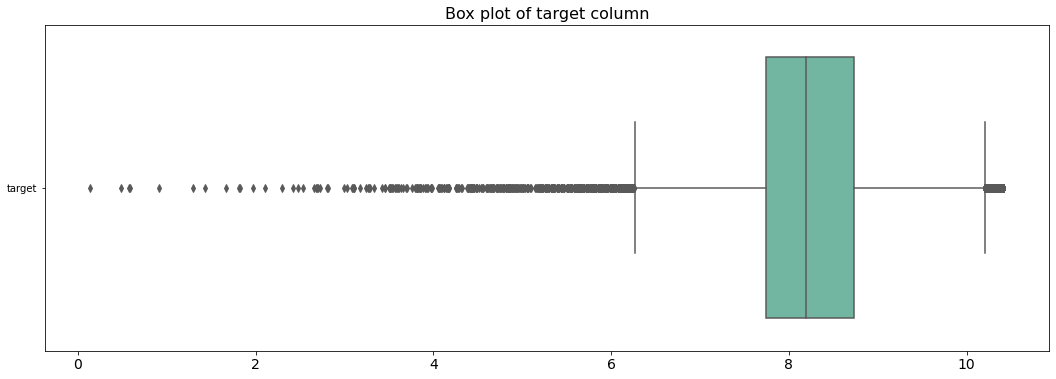

In [49]:
# outlier in target
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=raw_train_data[['target']], orient="h", palette="Set2" );
plt.xticks(fontsize= 14)
plt.title('Box plot of target column', fontsize=16);

In [50]:
# Deal with Outliers

from scipy import stats


def treatoutliers(df=None, columns=None, factor=1.5, method='IQR', treatment='cap'):

    for column in columns:
        if method == 'STD':
            permissable_std = factor * df[column].std()
            col_mean = df[column].mean()
            floor, ceil = col_mean - permissable_std, col_mean + permissable_std
        elif method == 'IQR':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            floor, ceil = Q1 - factor * IQR, Q3 + factor * IQR
            # print(floor, ceil)
        if treatment == 'remove':
            print(treatment, column)
            df = df[(df[column] >= floor) & (df[column] <= ceil)]
        elif treatment == 'cap':
            print(treatment, column)
            df[column] = df[column].clip(floor, ceil)

    return df

In [51]:
#remove outliere from target column 
#for colName in [['target']]:
    #X_full = treatoutliers(df=X_full,columns=colName, treatment='remove')         
    
#Quantile-based Flooring and Capping
for colName in [['target','cont0','cont6','cont8']]:
    raw_train_data = treatoutliers(df=raw_train_data,columns=colName, treatment='cap')      
    
raw_train_data.info()

cap target
cap cont0
cap cont6
cap cont8
<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 1 to 499999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cont0   300000 non-null  float64
 11  cont1   300000 non-null  float64
 12  cont2   300000 non-null  float64
 13  cont3   300000 non-null  float64
 14  cont4   300000 non-null  float64
 15  cont5   300000 non-null  float64
 16  cont6   300000 non-null  float64
 17  cont7   300000 non-null  float64
 18  cont8   300000 non-null  float64
 19  cont9   300000 non-null  float64
 20  cont10 

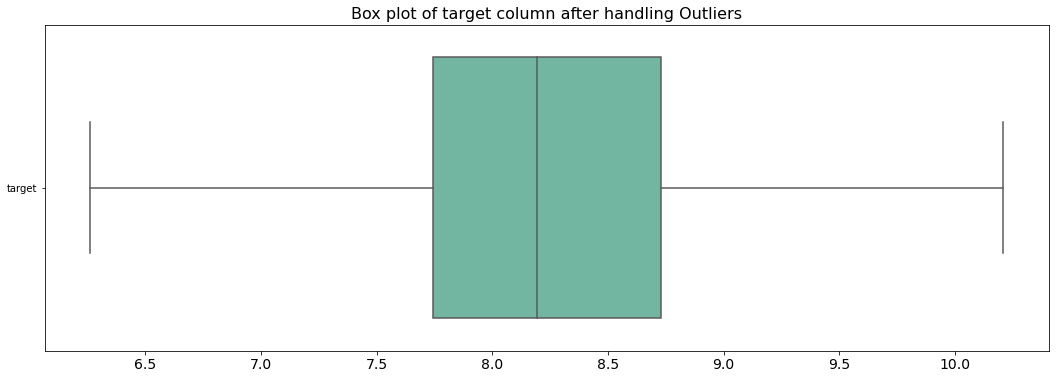

In [52]:
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=raw_train_data[['target']], orient="h", palette="Set2" );
plt.xticks(fontsize= 14)
plt.title('Box plot of target column after handling Outliers', fontsize=16);

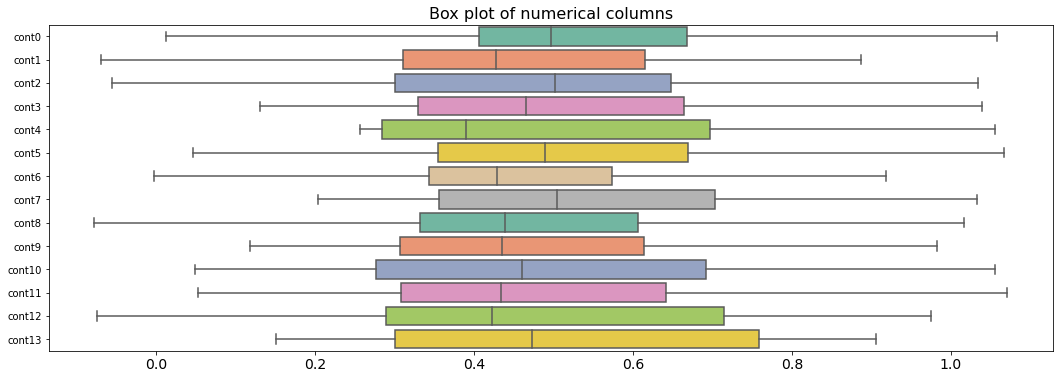

In [53]:

fig = plt.figure(figsize=(18,6))
sns.boxplot(data=raw_train_data[numeric_features], orient="h", palette="Set2");
plt.xticks(fontsize= 14)
plt.title('Box plot of numerical columns', fontsize=16);

In [54]:
# Deal with missing data
# No Misisng data in this dataset :)

In [55]:
# Remove rows with missing target, separate target from predictors
raw_train_data.dropna(axis=0, subset=['target'], inplace=True)
y = raw_train_data['target']
raw_train_data = raw_train_data.drop(['target'], axis=1)

In [56]:
features.remove('target')
X = raw_train_data[features]
X_test = raw_test_data[features]

In [57]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, 
                                                                train_size=0.9, test_size=0.1,
                                                                random_state=0)

In [58]:
X_train = X_train_full[features]
X_valid = X_valid_full[features]
X_test = X_test[features]

In [59]:
X_train.shape,X_test.shape

((270000, 24), (200000, 24))

In [60]:
X_train.head(10)

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,
460905,A,B,A,C,B,C,B,E,E,F,...,0.889253,0.494761,0.613863,0.708834,0.548014,0.321308,0.286040,0.663483,0.423789,0.264511
495259,B,A,B,C,B,A,A,E,C,F,...,0.896394,0.674308,0.393346,0.617894,0.418062,0.597744,0.736224,0.584338,0.273255,0.260882
428788,A,B,B,C,B,B,A,E,E,K,...,0.458592,0.247413,0.179286,0.501181,0.274230,0.389499,0.365823,0.625327,0.657805,0.464079
446524,A,B,B,C,B,B,A,E,A,A,...,0.513907,0.588984,0.359562,0.380042,0.703066,0.378986,0.287778,0.380397,0.529498,0.274086
51736,A,B,A,C,B,B,A,E,C,I,...,0.277507,0.047176,0.508692,0.304767,0.262476,0.287057,0.447125,0.294946,0.307148,0.816095
154258,A,B,A,C,B,D,A,E,C,F,...,0.287658,0.414860,0.503042,0.738899,0.446010,0.162130,0.240995,0.608510,0.301475,0.152118
173328,A,A,A,C,B,D,A,E,A,I,...,0.278817,0.496778,0.856234,0.638800,0.448493,0.470000,0.079233,0.443873,0.209474,0.249083
441251,B,B,A,C,B,D,A,B,A,F,...,0.282789,0.991672,0.378518,0.495329,1.016410,0.355661,0.999693,0.650566,0.740744,0.171389
145757,A,B,A,C,B,B,A,E,E,F,...,0.519875,0.311790,0.446452,0.869897,0.387396,0.353828,0.050080,0.387427,0.173077,0.695826


Model and training

In [61]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

#random seed
rans = 42

from sklearn.model_selection import StratifiedKFold

In [62]:
xgb_params = {'n_estimators': 1925, 'max_depth': 5,
              'learning_rate': 0.03601310230696705, 
              'gamma': 0.1, 'min_child_weight': 5, 
              'subsample': 0.9, 'colsample_bytree': 0.6, 
              'reg_alpha': 0.8, 'reg_lambda': 0.30000000000000004, 
              'random_state':rans }

model = XGBRegressor(**xgb_params) 

In [65]:
%%time


def log_transform(x):
    return np.log(x + 1)


transformer = FunctionTransformer(log_transform)


# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean'))
       #,('transformer', transformer)
       ,('RobustScaler', RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True))  
       ,('scaler', StandardScaler())
      # ,('scaler', MinMaxScaler())
      #,('normalizer',  Normalizer())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    #('imputer', SimpleImputer(strategy='constant'))
    ('imputer', SimpleImputer(strategy='most_frequent')) 
    ,('onehot', OneHotEncoder(handle_unknown='ignore'))
    #,('scaler', OrdinalEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder="passthrough"
  )

Wall time: 1 ms


In [66]:
%%time
#used for all models except for NN

#pca = PCA(n_components=20)
# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      #('pca',pca),
                      ('model', model)
                     ])

#final_model = clf.fit(X_train, y_train)    
#preds_valid = final_model.predict(X_valid)

nSplits = 10

kf = KFold(n_splits=nSplits, shuffle=True)

avg_valid_rmse = 0 # initialise variable for the average RMSE 
preds_valid = 0 # initialise variable for the Validation set predicitons 
predictions = 0 # initialise variable for the Test set predicitons 


for train_idx, test_idx in kf.split(X):
    X_train_split, X_valid_split = X.iloc[train_idx], X.iloc[test_idx]
    y_train_split, y_valid_split = y.iloc[train_idx], y.iloc[test_idx]
    
    final_model = clf.fit(X_train_split, y_train_split)
    
    #Predict current Validation fold using the fold model
    preds_valid_split = final_model.predict(X_valid_split)
    
    #Calculate the rmse error for current Validation fold
    rmse = mean_squared_error(preds_valid_split, y_valid_split, squared=False)
    print("rmse:{}".format(rmse))
    
    #Average of the rmse errors
    avg_valid_rmse += rmse / nSplits
     #Predict Total Validation & Test sets using the fold Model 
    preds_valid_all = final_model.predict(X_valid)
    preds_test_all = final_model.predict(X_test)

    #Average of the predictions
    preds_valid += preds_valid_all / nSplits
    predictions += preds_test_all / nSplits

print("Average Validation rmse: {}".format(avg_valid_rmse))   


#used for Neural Networks (regression)
#X_valid_tf = preprocessor.fit_transform(X_valid)
#preds_valid = model.predict(X_valid_tf)

#print MAE, RMSE
#print('MAE:',mean_absolute_error(y_valid, preds_valid))
#print('RMSE:',mean_squared_error(y_valid, preds_valid, squared=False))

rmse:0.7027593046410089
rmse:0.7093535023288443
rmse:0.7114243513056933
rmse:0.7049277566054811
rmse:0.7074636269081819
rmse:0.7054731946126629
rmse:0.7084799783140122
rmse:0.708673573483685
rmse:0.7038201872922001
rmse:0.7119840182272427
Average Validation rmse: 0.7074359493719012
Wall time: 2h 13min 36s


Feature importance

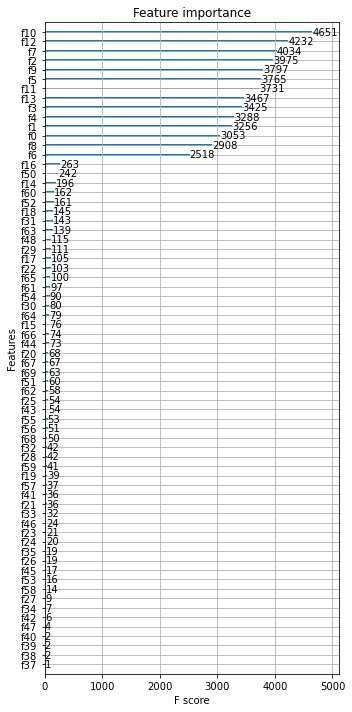

In [67]:
ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(5, 10)
plt.rcParams['figure.figsize'] = [5, 5]
plt.tight_layout()
plt.show()

In [68]:
final_model.score(X_valid_full,y_valid)

0.14642491647561018

In [74]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_predicted = final_model.predict(X_valid_full)

print("Mean Absolute Error: " + str(mean_absolute_error(y_predicted, y_valid)))
print("Root mean squared error: " + str(mean_squared_error(y_valid, y_predicted, squared=False)))

Mean Absolute Error: 0.5465450955671523
Root mean squared error: 0.6818261131729517


Save Results in a File

In [70]:
test_id = raw_test_data.id

In [71]:
y_predict = final_model.predict(X_test)

my_file = pd.DataFrame()

my_file['id'] = test_id
my_file['target'] = y_predict

In [72]:
my_file.to_csv('solution_s_v4.csv',index=False)